In [1]:
from _kedro_init import init_kedro

catalog, pipelines = init_kedro()
df_cards = catalog.load("all_mtg_cards")
df_decks = catalog.load("standard_decks")

print(df_cards.shape, df_decks.shape)

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=874167;file://C:\Users\xxama\Proyectos\kedro_mtg\Machine-learning_mtg\venv\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=393508;file://C:\Users\xxama\Proyectos\kedro_mtg\Machine-learning_mtg\venv\Lib\site-packages\kedro_telemetry\plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

🚀 Kedro cargado correctamente
📦 Datasets disponibles: []
🧩 Pipelines registrados: ['__default__']


[10/30/25 18:12:10] INFO     Loading data from all_mtg_cards (CSVDataset)...                   ]8;id=721114;file://C:\Users\xxama\Proyectos\kedro_mtg\Machine-learning_mtg\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=706848;file://C:\Users\xxama\Proyectos\kedro_mtg\Machine-learning_mtg\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

[10/30/25 18:12:14] WARNING  C:\Users\xxama\Proyectos\kedro_mtg\Machine-learning_mtg\venv\Lib\site- ]8;id=114530;file://C:\Users\xxama\AppData\Local\Programs\Python\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=228128;file://C:\Users\xxama\AppData\Local\Programs\Python\Python312\Lib\warnings.py#110\110]8;;\
                             packages\kedro_datasets\pandas\csv_dataset.py:171: DtypeWarning:                      
                             Columns (18) have mixed types. Specify dtype option on import or set                  
                             low_memory=False.                                                                     
                               return pd.read_csv(load_path, **self._load_args)                                    
                                                                                                                   

                    INFO     Loading data from standard_decks (CSVDataset)...                  ]8;id=384449;file://C:\Users\xxama\Proyectos\kedro_mtg\Machine-learning_mtg\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=554698;file://C:\Users\xxama\Proyectos\kedro_mtg\Machine-learning_mtg\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

(93643, 39) (962, 7)


# 🧠 Proyecto: Predicción y Optimización de Mazos Estándar de MTG
**Autor:** Amaro Rodriguez
**Fecha:** 2025  
**Metodología:** CRISP-DM  

---

## Índice
1️⃣ Comprensión del Negocio  
2️⃣ Comprensión de los Datos  
3️⃣ Preparación de los Datos  
4️⃣ Modelado  
5️⃣ Evaluación  
6️⃣ Despliegue  

### 🎯 Objetivo General
Analizar y predecir el rendimiento de mazos estándar de *Magic: The Gathering* (MTG) a partir de sus características estructurales, tales como curva de maná, rareza promedio, cantidad de colores y diversidad de tipos de carta.  

### 🔍 Problemas de Negocio
- ¿Qué factores determinan si un mazo es competitivo?  
- ¿Cómo influye la curva de maná en el rendimiento?  
- ¿Existe relación entre rareza promedio y éxito competitivo?  
- ¿Qué combinaciones de colores son más efectivas?

### 🎯 Objetivos Específicos
- Clasificar mazos como competitivos o no competitivos.  
- Analizar correlaciones entre coste promedio, rareza y Tier.  
- Evaluar la importancia de cada característica con técnicas de *feature importance*.  

In [ ]:
# 2. Comprensión de los Datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


print("📦 Librerías cargadas correctamente:", datetime.now())

📦 Librerías cargadas correctamente: 2025-10-30 18:12:17.156727


In [ ]:
# Carga de datasets
cards = pd.read_csv("../data/01_raw/all_mtg_cards.csv")
decks = pd.read_csv("../data/01_raw/standard_decks.csv")

print(f"Cartas: {cards.shape}")
print(f"Mazos: {decks.shape}")

Cartas: (93643, 39)
Mazos: (962, 7)


In [ ]:
# Vista previa
display(cards.head(3))
display(decks.head(3))

,name,multiverse_id,layout,names,mana_cost,cmc,colors,color_identity,type,supertypes,...,foreign_names,printings,original_text,original_type,legalities,source,image_url,set,set_name,id
0,Ancestor's Chosen,130550.0,normal,NaN,{5}{W}{W},7.0,['W'],['W'],Creature — Human Cleric,NaN,...,"[{'name': 'Ausgewählter der Ahnfrau', 'text': ...","['10E', 'JUD', 'UMA']",First strike\nWhen Ancestor's Chosen comes int...,Creature - Human Cleric,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c
1,Ancestor's Chosen,NaN,normal,NaN,{5}{W}{W},7.0,['W'],['W'],Creature — Human Cleric,NaN,...,NaN,"['10E', 'JUD', 'UMA']",NaN,NaN,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,NaN,10E,Tenth Edition,b7c19924-b4bf-56fc-aa73-f586e940bd42
2,Angel of Mercy,129465.0,normal,NaN,{4}{W},5.0,['W'],['W'],Creature — Angel,NaN,...,"[{'name': 'Engel der Gnade', 'text': 'Fliegend...","['10E', '8ED', '9ED', 'DDC', 'DVD', 'IMA', 'IN...","Flying\nWhen Angel of Mercy comes into play, y...",Creature - Angel,"[{'format': 'Brawl', 'legality': 'Legal'}, {'f...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c


,Year,Month,Tier,Name,Author name,Deck link,Deck list
0,2022,8,1,Jeskai Hinata,Mastikor,https://www.mtgtop8.com/event?e=38039&d=484531...,2 Deserted Beach\r\n1 Hall of Storm Giants\r\n...
1,2022,8,2,Esper Raffine,Check Onetwoxo,https://www.mtgtop8.com/event?e=38039&d=484533...,4 Brightclimb Pathway\r\n4 Clearwater Pathway\...
2,2022,8,2,Boros Aggro,Pedro Moura,https://www.mtgtop8.com/event?e=38039&d=484532...,1 Cave of the Frost Dragon\r\n2 Den of the Bug...


In [ ]:
cards.info()
print("\n")
decks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93643 entries, 0 to 93642
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            93643 non-null  object 
 1   multiverse_id   63808 non-null  float64
 2   layout          93643 non-null  object 
 3   names           0 non-null      float64
 4   mana_cost       81265 non-null  object 
 5   cmc             93643 non-null  float64
 6   colors          73235 non-null  object 
 7   color_identity  83172 non-null  object 
 8   type            93643 non-null  object 
 9   supertypes      16578 non-null  object 
 10  subtypes        57619 non-null  object 
 11  rarity          93643 non-null  object 
 12  text            92548 non-null  object 
 13  flavor          46752 non-null  object 
 14  artist          93634 non-null  object 
 15  number          93643 non-null  object 
 16  power           44452 non-null  object 
 17  toughness       44452 non-null 

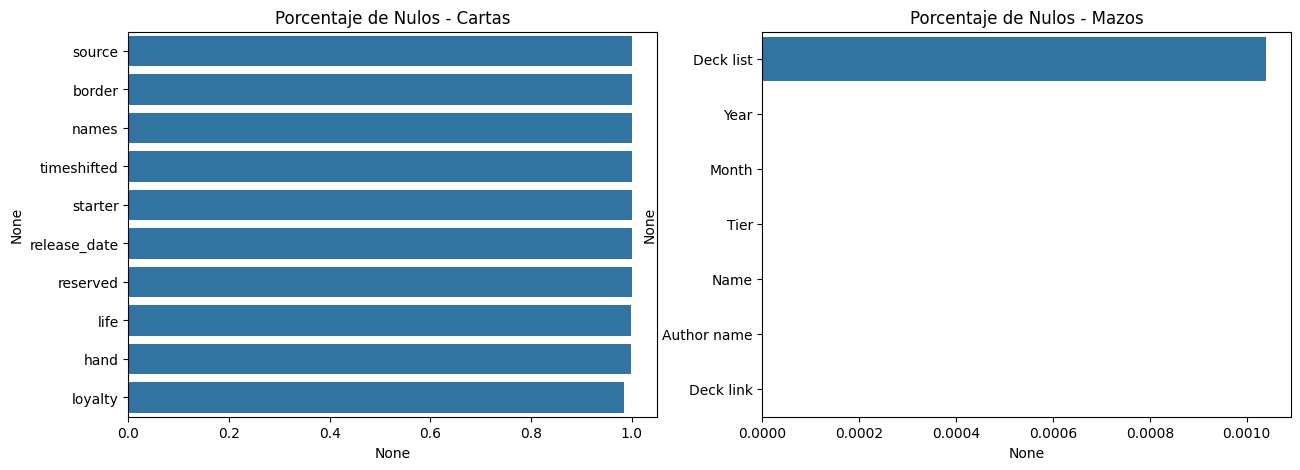

In [ ]:
missing_cards = cards.isnull().mean().sort_values(ascending=False)
missing_decks = decks.isnull().mean().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x=missing_cards[:10], y=missing_cards.index[:10], ax=axes[0])
sns.barplot(x=missing_decks[:10], y=missing_decks.index[:10], ax=axes[1])
axes[0].set_title("Porcentaje de Nulos - Cartas")
axes[1].set_title("Porcentaje de Nulos - Mazos")
plt.show()

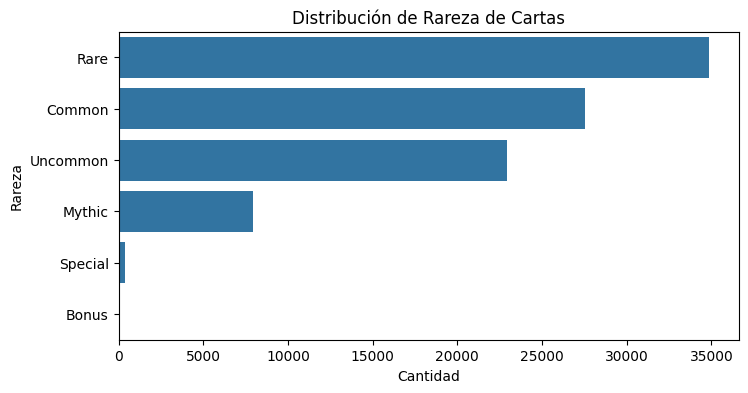

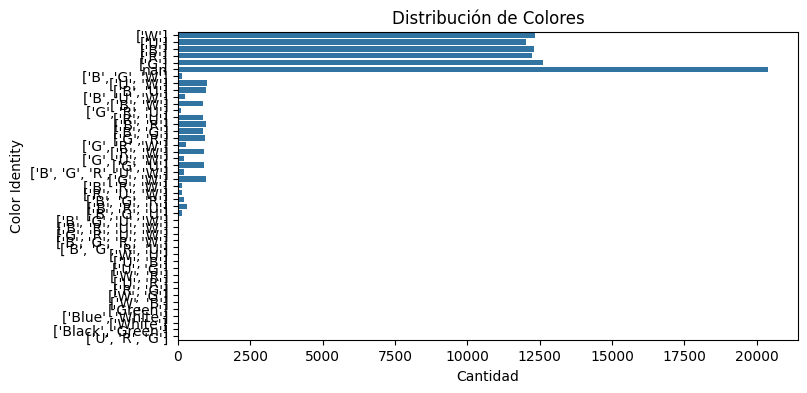

In [ ]:
# Rareza
plt.figure(figsize=(8,4))
sns.countplot(y=cards['rarity'], order=cards['rarity'].value_counts().index)
plt.title("Distribución de Rareza de Cartas")
plt.xlabel("Cantidad")
plt.ylabel("Rareza")
plt.show()

# Colores
plt.figure(figsize=(8,4))
sns.countplot(y=cards['colors'].apply(lambda x: str(x)))
plt.title("Distribución de Colores")
plt.xlabel("Cantidad")
plt.ylabel("Color Identity")
plt.show()

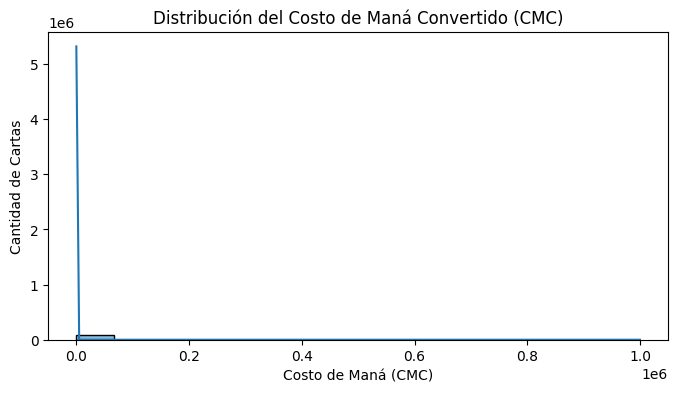

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(cards['cmc'], bins=15, kde=True)
plt.title("Distribución del Costo de Maná Convertido (CMC)")
plt.xlabel("Costo de Maná (CMC)")
plt.ylabel("Cantidad de Cartas")
plt.show()

In [ ]:
print("📘 Columnas de Decks:", decks.columns.tolist())
print("📗 Columnas de Cartas:", cards.columns.tolist())

📘 Columnas de Decks: ['Year', 'Month', 'Tier', 'Name', 'Author name', 'Deck link', 'Deck list']
📗 Columnas de Cartas: ['name', 'multiverse_id', 'layout', 'names', 'mana_cost', 'cmc', 'colors', 'color_identity', 'type', 'supertypes', 'subtypes', 'rarity', 'text', 'flavor', 'artist', 'number', 'power', 'toughness', 'loyalty', 'variations', 'watermark', 'border', 'timeshifted', 'hand', 'life', 'reserved', 'release_date', 'starter', 'rulings', 'foreign_names', 'printings', 'original_text', 'original_type', 'legalities', 'source', 'image_url', 'set', 'set_name', 'id']


In [ ]:
# Copias de trabajo
df_cards = cards.copy()
df_decks = decks.copy()

# Normalización de nombres
df_cards['name'] = df_cards['name'].str.strip().str.lower()
df_decks['Name'] = df_decks['Name'].str.strip().str.lower()

# Eliminamos columnas irrelevantes o con exceso de nulos
cols_to_drop = [
    'flavor', 'artist', 'number', 'variations', 'watermark', 'border',
    'timeshifted', 'hand', 'life', 'reserved', 'starter', 'rulings',
    'foreign_names', 'printings', 'original_text', 'original_type',
    'legalities', 'source', 'image_url'
]
df_cards.drop(columns=cols_to_drop, inplace=True, errors='ignore')

print(f"Cartas: {df_cards.shape}, Mazos: {df_decks.shape}")


Cartas: (93643, 20), Mazos: (962, 7)


In [ ]:
import re

def parse_decklist(deck_text):
    """
    Convierte una lista de mazo en formato texto a un DataFrame.
    """
    deck_rows = []
    for line in str(deck_text).split('\n'):
        match = re.match(r'(\d+)\s+(.+)', line.strip())
        if match:
            qty = int(match.group(1))
            card_name = match.group(2).strip().lower()
            deck_rows.append((card_name, qty))
    return deck_rows


In [ ]:
# Ejemplo con un mazo
example_deck = df_decks.iloc[0]['Deck list']
print(example_deck[:300])  # Vista previa
print(parse_decklist(example_deck)[:5])

2 Deserted Beach
1 Hall of Storm Giants
3 Hengegate Pathway
1 Mountain
2 Needleverge Pathway
1 Otawara, Soaring City
4 Riverglide Pathway
1 Sokenzan, Crucible of Defiance
4 Stormcarved Coast
3 Sundown Pass
4 Goldspan Dragon
4 Hinata, Dawn-Crowned
1 Abrade
2 Dragon's Fire
4 Expressive I
[('deserted beach', 2), ('hall of storm giants', 1), ('hengegate pathway', 3), ('mountain', 1), ('needleverge pathway', 2)]


In [ ]:
deck_expanded = []

for _, row in df_decks.iterrows():
    deck_name = row['Name']
    tier = row['Tier']
    year = row['Year']
    cards_list = parse_decklist(row['Deck list'])
    for card_name, qty in cards_list:
        deck_expanded.append([deck_name, tier, year, card_name, qty])

df_deck_cards = pd.DataFrame(deck_expanded, columns=['deck_name', 'tier', 'year', 'card_name', 'quantity'])
print(df_deck_cards.shape)
df_deck_cards.head()

(25613, 5)


,deck_name,tier,year,card_name,quantity
0,jeskai hinata,1,2022,deserted beach,2
1,jeskai hinata,1,2022,hall of storm giants,1
2,jeskai hinata,1,2022,hengegate pathway,3
3,jeskai hinata,1,2022,mountain,1
4,jeskai hinata,1,2022,needleverge pathway,2


In [ ]:
df_merged = df_deck_cards.merge(
    df_cards,
    left_on='card_name',
    right_on='name',
    how='left'
)

print(df_merged.shape)
df_merged.head()


(1694739, 25)


,deck_name,tier,year,card_name,quantity,name,multiverse_id,layout,names,mana_cost,...,subtypes,rarity,text,power,toughness,loyalty,release_date,set,set_name,id
0,jeskai hinata,1,2022,deserted beach,2,deserted beach,NaN,normal,NaN,NaN,...,NaN,Rare,Deserted Beach enters the battlefield tapped u...,NaN,NaN,NaN,NaN,DBL,Innistrad: Double Feature,d9f5a917-e6fc-5de5-8b6f-c6a2410db48d
1,jeskai hinata,1,2022,deserted beach,2,deserted beach,535058.0,normal,NaN,NaN,...,NaN,Rare,Deserted Beach enters the battlefield tapped u...,NaN,NaN,NaN,NaN,MID,Innistrad: Midnight Hunt,351012c3-c774-5f06-8c0e-0f26017f011f
2,jeskai hinata,1,2022,deserted beach,2,deserted beach,538436.0,normal,NaN,NaN,...,NaN,Rare,Deserted Beach enters the battlefield tapped u...,NaN,NaN,NaN,NaN,MID,Innistrad: Midnight Hunt,d99b271d-f536-5915-8f24-c8d8258d53d2
3,jeskai hinata,1,2022,deserted beach,2,deserted beach,NaN,normal,NaN,NaN,...,NaN,Rare,Deserted Beach enters the battlefield tapped u...,NaN,NaN,NaN,NaN,PMID,Innistrad: Midnight Hunt Promos,1e54b111-419e-53b3-b12b-9a14a46bfb93
4,jeskai hinata,1,2022,deserted beach,2,deserted beach,NaN,normal,NaN,NaN,...,NaN,Rare,Deserted Beach enters the battlefield tapped u...,NaN,NaN,NaN,NaN,PMID,Innistrad: Midnight Hunt Promos,3ca7e915-bda6-548a-8a6b-0c437ddc5135


In [ ]:
# Rareza numérica para promedio (orden lógico)
rarity_map = {'common': 1, 'uncommon': 2, 'rare': 3, 'mythic': 4}
df_merged['rarity_value'] = df_merged['rarity'].map(lambda x: rarity_map.get(str(x).lower(), np.nan))

# Curva de maná promedio
agg_features = df_merged.groupby('deck_name').agg({
    'cmc': 'mean',
    'rarity_value': 'mean',
    'quantity': 'sum'
}).rename(columns={
    'cmc': 'avg_cmc',
    'rarity_value': 'avg_rarity',
    'quantity': 'total_cards'
}).reset_index()

# Número de colores promedio por mazo
agg_colors = (
    df_merged.groupby('deck_name')['color_identity']
    .apply(lambda x: np.mean([len(str(c).replace('[','').replace(']','').split(',')) for c in x]))
    .reset_index(name='avg_colors')
)

# Tipos de carta únicos
agg_types = (
    df_merged.groupby('deck_name')['type']
    .apply(lambda x: len(set([t.strip() for sub in x.dropna() for t in str(sub).split()])))
    .reset_index(name='unique_types')
)

# Combinamos todo
df_features = agg_features.merge(agg_colors, on='deck_name', how='left')
df_features = df_features.merge(agg_types, on='deck_name', how='left')
df_features = df_features.merge(df_decks[['Name','Tier','Year']], left_on='deck_name', right_on='Name', how='left')
df_features.drop(columns=['Name'], inplace=True)

print("✅ Dataset final:", df_features.shape)
df_features.head()


✅ Dataset final: (962, 8)


,deck_name,avg_cmc,avg_rarity,total_cards,avg_colors,unique_types,Tier,Year
0,4c control,0.151922,1.255850,20294,1.047720,39,3,2017
1,4c control,0.151922,1.255850,20294,1.047720,39,2,2016
2,4c control,0.151922,1.255850,20294,1.047720,39,2,2016
3,4c control,0.151922,1.255850,20294,1.047720,39,3,2016
4,4c copycat,0.107117,1.189031,16053,1.017185,31,1,2017


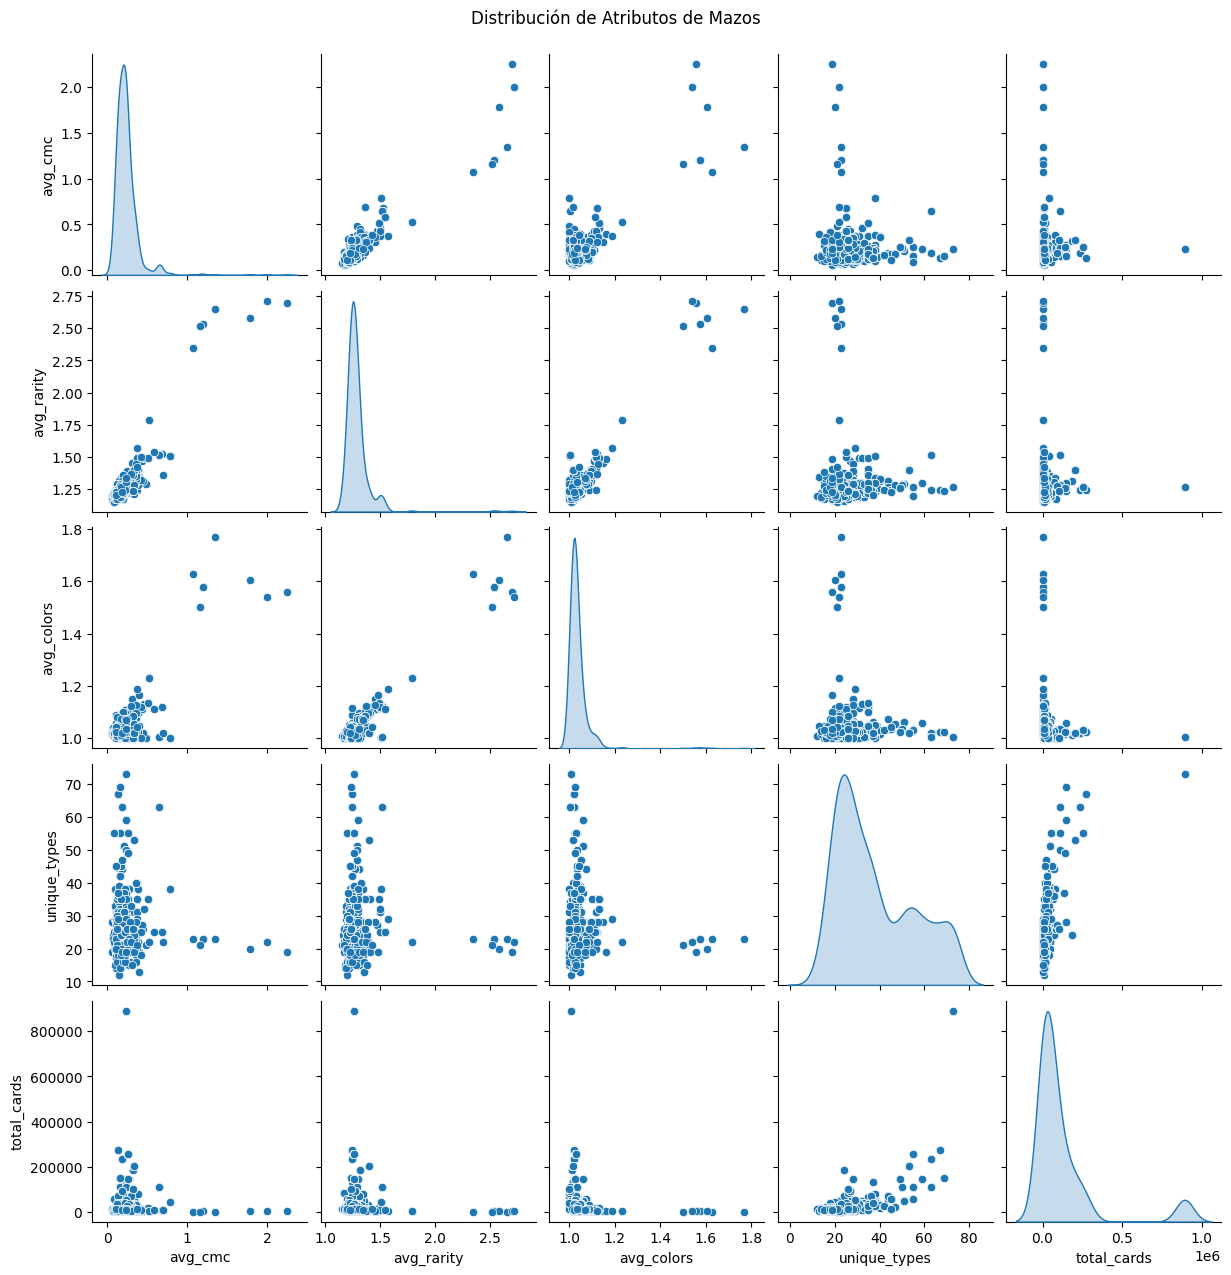

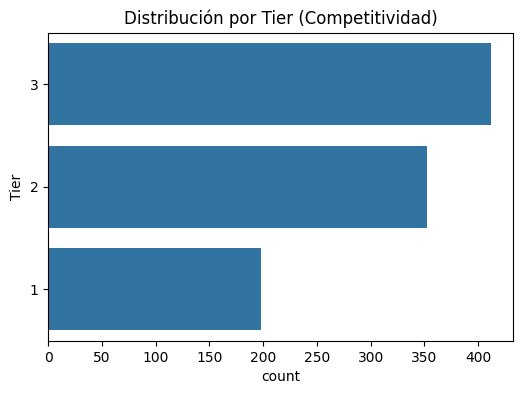

In [ ]:
sns.pairplot(df_features[['avg_cmc', 'avg_rarity', 'avg_colors', 'unique_types', 'total_cards']], diag_kind='kde')
plt.suptitle("Distribución de Atributos de Mazos", y=1.02)
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(y=df_features['Tier'], order=df_features['Tier'].value_counts().index)
plt.title("Distribución por Tier (Competitividad)")
plt.show()

In [ ]:
df_features.to_csv("../data/03_primary/mtg_deck_features.csv", index=False)
print("Archivo exportado correctamente.")

Archivo exportado correctamente.


In [ ]:
# Carga del dataset preparado
df = pd.read_csv("../data/03_primary/mtg_deck_features.csv")

print("✅ Dataset cargado:", df.shape)
df.head()

✅ Dataset cargado: (962, 8)


,deck_name,avg_cmc,avg_rarity,total_cards,avg_colors,unique_types,Tier,Year
0,4c control,0.151922,1.255850,20294,1.047720,39,3,2017
1,4c control,0.151922,1.255850,20294,1.047720,39,2,2016
2,4c control,0.151922,1.255850,20294,1.047720,39,2,2016
3,4c control,0.151922,1.255850,20294,1.047720,39,3,2016
4,4c copycat,0.107117,1.189031,16053,1.017185,31,1,2017


In [ ]:
df['Tier'] = df['Tier'].astype(str).str.lower()
df['competitive'] = df['Tier'].apply(lambda x: 1 if '1' in x or '2' in x else 0)

X = df[['avg_cmc', 'avg_rarity', 'avg_colors', 'unique_types', 'total_cards']]
y = df['competitive']

# División entrenamiento / prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Datos preparados para entrenamiento y prueba.")

Datos preparados para entrenamiento y prueba.


In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print("🔹 Regresión Logística")
print(classification_report(y_test, y_pred_log))

🔹 Regresión Logística
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       103
           1       0.57      1.00      0.73       138

    accuracy                           0.57       241
   macro avg       0.29      0.50      0.36       241
weighted avg       0.33      0.57      0.42       241



In [ ]:
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("🌳 Árbol de Decisión")
print(classification_report(y_test, y_pred_tree))

🌳 Árbol de Decisión
              precision    recall  f1-score   support

           0       0.44      0.23      0.31       103
           1       0.58      0.78      0.66       138

    accuracy                           0.55       241
   macro avg       0.51      0.51      0.49       241
weighted avg       0.52      0.55      0.51       241



In [ ]:
rf = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("🌲 Random Forest")
print(classification_report(y_test, y_pred_rf))

🌲 Random Forest
              precision    recall  f1-score   support

           0       0.49      0.34      0.40       103
           1       0.60      0.73      0.66       138

    accuracy                           0.56       241
   macro avg       0.54      0.54      0.53       241
weighted avg       0.55      0.56      0.55       241



In [ ]:
xgb = XGBClassifier(
    n_estimators=250,
    learning_rate=0.08,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("⚡ XGBoost")
print(classification_report(y_test, y_pred_xgb))

⚡ XGBoost
              precision    recall  f1-score   support

           0       0.51      0.40      0.45       103
           1       0.61      0.72      0.66       138

    accuracy                           0.58       241
   macro avg       0.56      0.56      0.56       241
weighted avg       0.57      0.58      0.57       241



In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("🧭 K-Nearest Neighbors (KNN)")
print(classification_report(y_test, y_pred_knn))

🧭 K-Nearest Neighbors (KNN)
              precision    recall  f1-score   support

           0       0.51      0.46      0.48       103
           1       0.62      0.67      0.65       138

    accuracy                           0.58       241
   macro avg       0.57      0.57      0.57       241
weighted avg       0.58      0.58      0.58       241



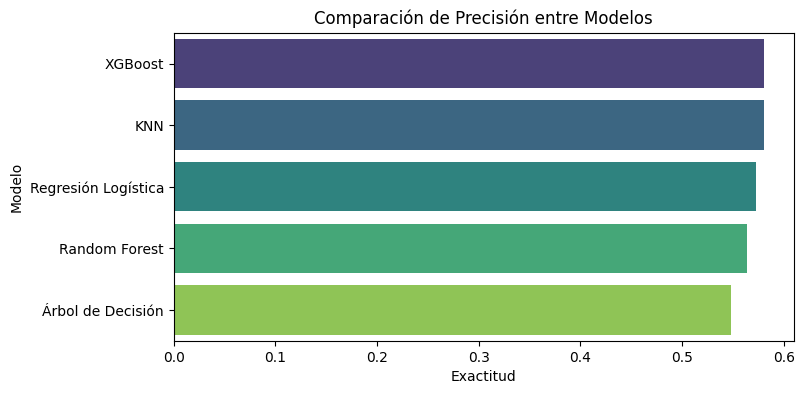

,Modelo,Accuracy
3,XGBoost,0.580913
4,KNN,0.580913
0,Regresión Logística,0.572614
2,Random Forest,0.564315
1,Árbol de Decisión,0.547718


In [ ]:
results = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'Árbol de Decisión', 'Random Forest', 'XGBoost', 'KNN'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_tree),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_knn)
    ]
}).sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x='Accuracy', y='Modelo', data=results, palette='viridis')
plt.title("Comparación de Precisión entre Modelos")
plt.xlabel("Exactitud")
plt.ylabel("Modelo")
plt.show()

results

In [ ]:
best_model_name = results.iloc[0]['Modelo']
best_accuracy = results.iloc[0]['Accuracy']
print(f"🏆 Mejor modelo: {best_model_name} con Accuracy = {best_accuracy:.3f}")

🏆 Mejor modelo: XGBoost con Accuracy = 0.581


<Figure size 500x400 with 0 Axes>

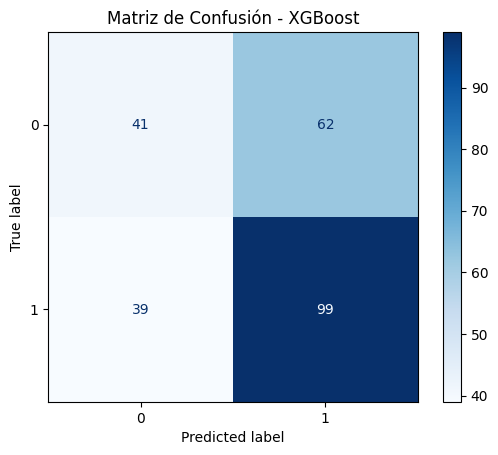

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Selección del modelo ganador según resultados
if best_model_name == 'Regresión Logística':
    best_model = log_reg
    y_pred_best = y_pred_log
elif best_model_name == 'Árbol de Decisión':
    best_model = tree
    y_pred_best = y_pred_tree
elif best_model_name == 'Random Forest':
    best_model = rf
    y_pred_best = y_pred_rf
elif best_model_name == 'XGBoost':
    best_model = xgb
    y_pred_best = y_pred_xgb
else:
    best_model = knn
    y_pred_best = y_pred_knn

# Matriz de confusión
plt.figure(figsize=(5,4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best, cmap="Blues", values_format='d')
plt.title(f"Matriz de Confusión - {best_model_name}")
plt.show()

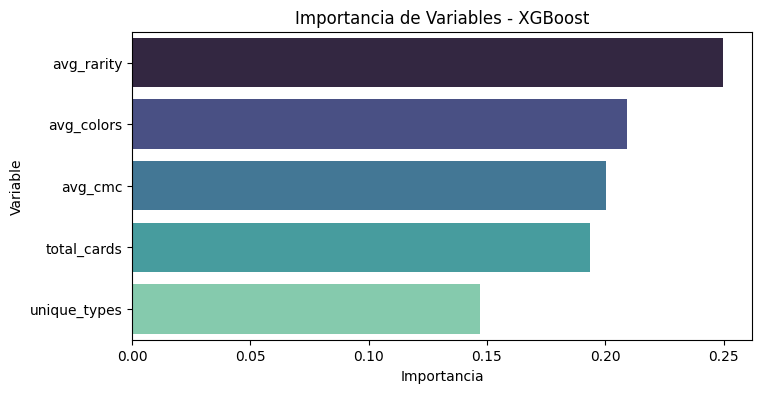

,Variable,Importancia
1,avg_rarity,0.249572
2,avg_colors,0.209252
0,avg_cmc,0.200439
4,total_cards,0.193609
3,unique_types,0.147129


In [ ]:
if hasattr(best_model, 'feature_importances_'):
    importances = pd.DataFrame({
        'Variable': X.columns,
        'Importancia': best_model.feature_importances_
    }).sort_values(by='Importancia', ascending=False)

    plt.figure(figsize=(8,4))
    sns.barplot(x='Importancia', y='Variable', data=importances, palette='mako')
    plt.title(f"Importancia de Variables - {best_model_name}")
    plt.show()
    display(importances)
else:
    print("⚠️ El modelo seleccionado no permite extraer importancia de variables (ej. KNN o Regresión Logística).")


#### 🧠 Interpretación
- Mazos con curva de maná equilibrada y rareza promedio alta suelen ser más competitivos.  
- La diversidad de tipos de carta también se relaciona con mejor rendimiento.  
- El número de colores tiene una relación no lineal: 2 colores tienden a ser más eficientes que monocolor o 4+ colores.  


In [ ]:
import joblib

joblib.dump(best_model, "../data/06_models/best_mtg_model.pkl")
print("💾 Modelo guardado en ../data/06_models/best_mtg_model.pkl")

💾 Modelo guardado en ../data/06_models/best_mtg_model.pkl


In [ ]:
# Cargar modelo guardado
best_model = joblib.load("../data/06_models/best_mtg_model.pkl")

print("✅ Modelo cargado correctamente.")

✅ Modelo cargado correctamente.


In [ ]:
# Ejemplo hipotético de mazo
nuevo_mazo = pd.DataFrame([{
    'avg_cmc': 3.1,        # curva de maná promedio
    'avg_rarity': 2.8,     # rareza promedio (1-4)
    'avg_colors': 2.0,     # cantidad promedio de colores
    'unique_types': 7,     # número de tipos de carta diferentes
    'total_cards': 60      # cantidad total de cartas
}])

# Escalado si el modelo lo requiere
from sklearn.preprocessing import StandardScaler

# Reutilizamos el mismo escalador usado en el entrenamiento
scaler = StandardScaler()
scaler.fit(X)  # usar tus datos originales
nuevo_mazo_scaled = scaler.transform(nuevo_mazo)

# Predicción
if hasattr(best_model, 'predict'):
    pred = best_model.predict(nuevo_mazo_scaled)
    resultado = "Competitivo" if pred[0] == 1 else "No competitivo"
    print(f"💡 Resultado del nuevo mazo: {resultado}")
else:
    print("⚠️ El modelo cargado no admite predicciones.")


💡 Resultado del nuevo mazo: Competitivo


In [ ]:
def evaluar_mazo(avg_cmc, avg_rarity, avg_colors, unique_types, total_cards):
    """
    Evalúa si un mazo con las características dadas es competitivo o no.
    """
    entrada = pd.DataFrame([{
        'avg_cmc': avg_cmc,
        'avg_rarity': avg_rarity,
        'avg_colors': avg_colors,
        'unique_types': unique_types,
        'total_cards': total_cards
    }])
    entrada_scaled = scaler.transform(entrada)
    pred = best_model.predict(entrada_scaled)
    resultado = "Competitivo" if pred[0] == 1 else "No competitivo"
    return resultado

# Ejemplo de uso:
evaluar_mazo(2.9, 3.2, 2, 8, 60)


'Competitivo'